## Question 7 -
Using the data from Question 4 (meteorite_data.csv), write code to analyze the data and answer the following questions

#### Note -

Draw plots to demonstrate the analysis for the following questions for better visualizations
Write code comments wherever required for code understanding

#### Insights to be drawn -

● Get all the Earth meteorites that fell before the year 2000

● Get all the earth meteorites co-ordinates who fell before the year 1970

● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000kg

In [50]:
# Required Libraries
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import os
import ast
import numpy as np

In [3]:
df = pd.read_csv('meteorite_data.csv')
df.head()

,name,id,nametype,recclass,mass,year,reclat,reclong,coordinates
0,Aachen,1,Valid,L5,21.0,1880-01-01T00:00:00.000,50.77500,6.08333,"[6.08333, 50.775]"
1,Aarhus,2,Valid,H6,720.0,1951-01-01T00:00:00.000,56.18333,10.23333,"[10.23333, 56.18333]"
2,Abee,6,Valid,EH4,107000.0,1952-01-01T00:00:00.000,54.21667,-113.00000,"[-113, 54.21667]"
3,Acapulco,10,Valid,Acapulcoite,1914.0,1976-01-01T00:00:00.000,16.88333,-99.90000,"[-99.9, 16.88333]"
4,Achiras,370,Valid,L6,780.0,1902-01-01T00:00:00.000,-33.16667,-64.95000,"[-64.95, -33.16667]"


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         1000 non-null   object 
 1   id           1000 non-null   int64  
 2   nametype     1000 non-null   object 
 3   recclass     1000 non-null   object 
 4   mass         972 non-null    float64
 5   year         999 non-null    object 
 6   reclat       988 non-null    float64
 7   reclong      988 non-null    float64
 8   coordinates  988 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 70.4+ KB


In [32]:
df.shape

(1000, 10)

### Prob_1: Get all the Earth meteorites that fell before the year 2000

In [27]:
df['year'] = pd.to_datetime(df['year'], errors='coerce')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   name         1000 non-null   object        
 1   id           1000 non-null   int64         
 2   nametype     1000 non-null   object        
 3   recclass     1000 non-null   object        
 4   mass         972 non-null    float64       
 5   year         982 non-null    datetime64[ns]
 6   reclat       988 non-null    float64       
 7   reclong      988 non-null    float64       
 8   coordinates  988 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 70.4+ KB


In [29]:
df['year_feature'] = df['year'].dt.year

In [38]:
df_prob1 = df[df['year_feature'] < 2000]

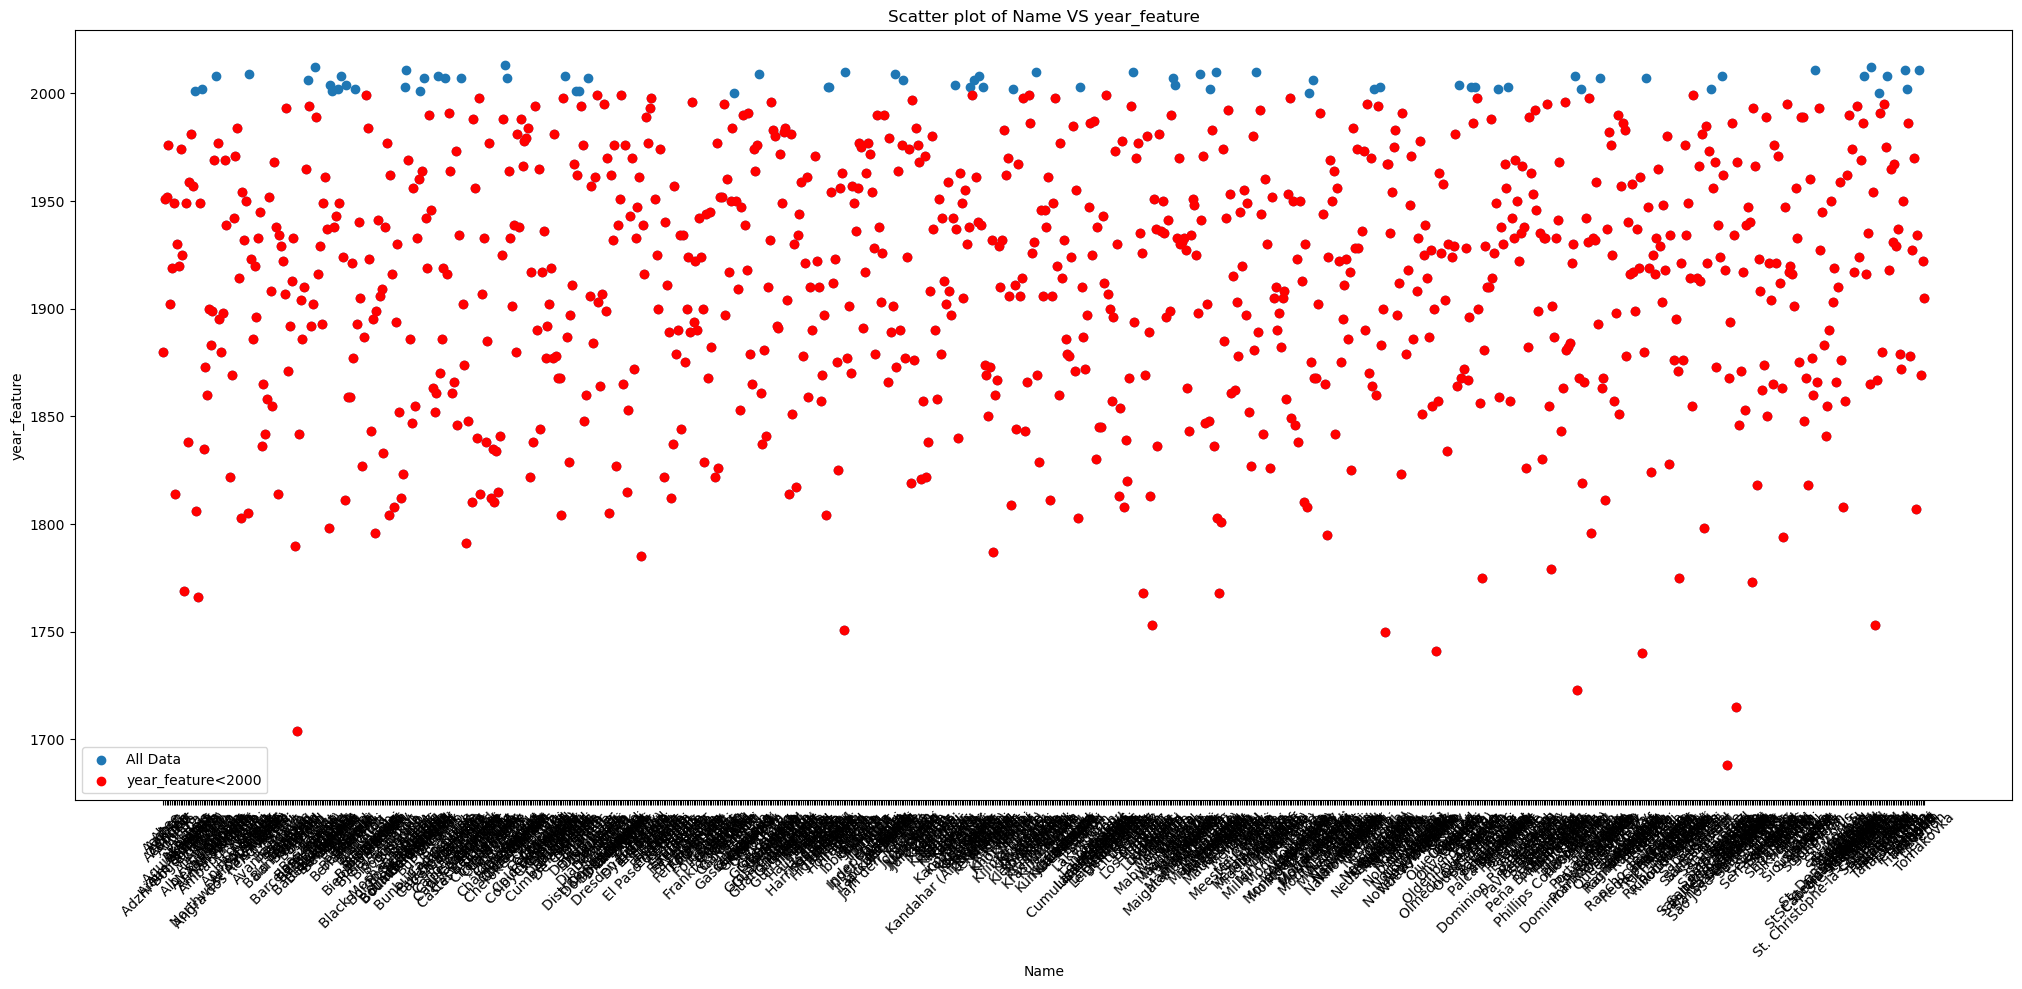

In [39]:
plt.figure(figsize=(25,10))
plt.scatter(df['name'], df['year_feature'], label='All Data')
plt.scatter(df_prob1['name'], df_prob1['year_feature'], color='red', label='year_feature<2000')
plt.xlabel('Name')
plt.ylabel('year_feature')
plt.title('Scatter plot of Name VS year_feature')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [40]:
df_prob1[["name","year_feature"]]

,name,year_feature
0,Aachen,1880.0
1,Aarhus,1951.0
2,Abee,1952.0
3,Acapulco,1976.0
4,Achiras,1902.0
...,...,...
994,Timochin,1807.0
995,Tirupati,1934.0
997,Tjabe,1869.0
998,Tjerebon,1922.0


#### Conclusion
There are total 912 meteorites that fell before the year 2000

### Prob_2: Get all the earth meteorites co-ordinates who fell before the year 1970

In [51]:
df['coordinates'] = df['coordinates'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else np.NaN)

In [52]:
df['coordinates_len'] = df['coordinates'].str.len()

In [54]:
df[df['year_feature'] < 1970][['coordinates','year_feature']]

,coordinates,year_feature
0,"[6.08333, 50.775]",1880.0
1,"[10.23333, 56.18333]",1951.0
2,"[-113, 54.21667]",1952.0
4,"[-64.95, -33.16667]",1902.0
5,"[71.8, 32.1]",1919.0
...,...,...
994,"[35.2, 54.5]",1807.0
995,"[79.41667, 13.63333]",1934.0
997,"[111.53333, -7.08333]",1869.0
998,"[106.58333, -6.66667]",1922.0


In [55]:
df_prob2 = df[df['year_feature'] < 1970]

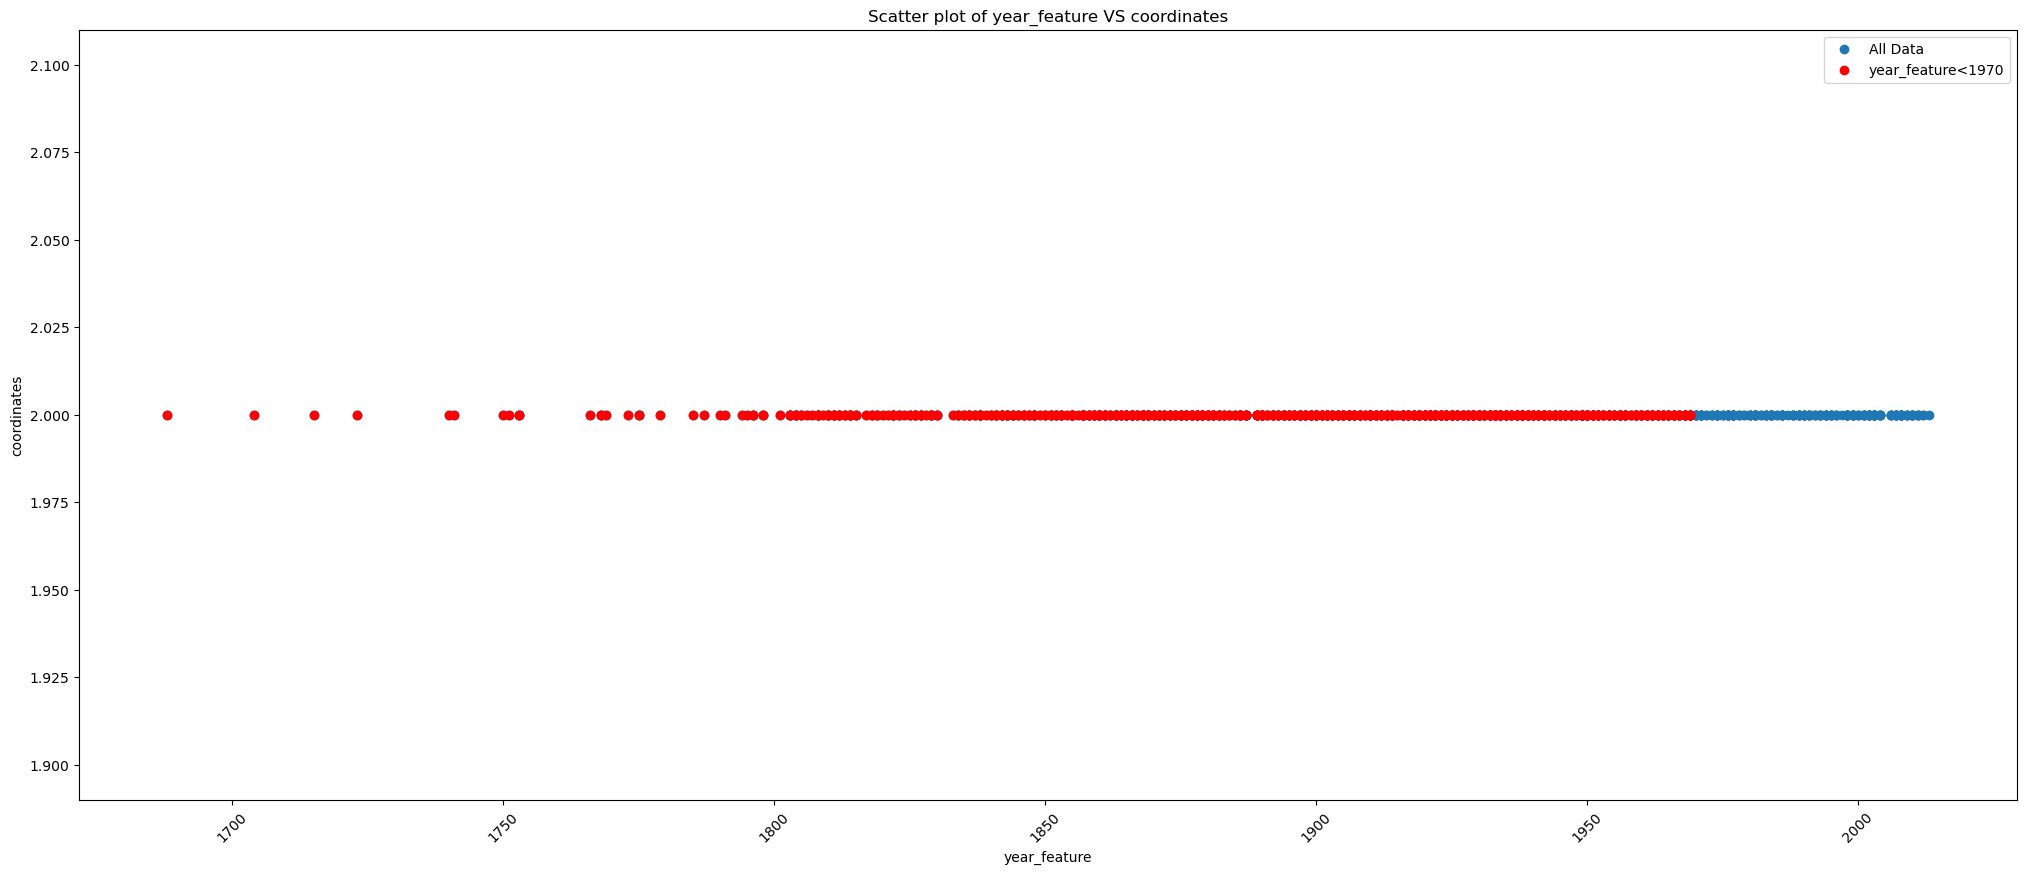

In [57]:
plt.figure(figsize=(25,10))
plt.scatter(df['year_feature'], df['coordinates_len'], label='All Data')
plt.scatter(df_prob2['year_feature'], df_prob2['coordinates_len'], color='red', label='year_feature<1970')
plt.xlabel('year_feature')
plt.ylabel('coordinates')
plt.title('Scatter plot of year_feature VS coordinates')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### Prob_3: Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000kg

In [59]:
df[df['mass'] > 10000]

,name,id,nametype,recclass,mass,year,reclat,reclong,coordinates,year_feature,coordinates_len
2,Abee,6,Valid,EH4,107000.0,1952-01-01,54.21667,-113.00000,"[-113, 54.21667]",1952.0,2.0
7,Agen,392,Valid,H5,30000.0,1814-01-01,44.21667,0.61667,"[0.61667, 44.21667]",1814.0,2.0
11,Aïr,424,Valid,L6,24000.0,1925-01-01,19.08333,8.38333,"[8.38333, 19.08333]",1925.0,2.0
16,Akyumak,433,Valid,"Iron, IVA",50000.0,1981-01-01,39.91667,42.81667,"[42.81667, 39.91667]",1981.0,2.0
27,Alfianello,466,Valid,L6,228000.0,1883-01-01,45.26667,10.15000,"[10.15, 45.26667]",1883.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
991,Tieschitz,23989,Valid,H/L3.6,28000.0,1878-01-01,49.60000,17.11667,"[17.11667, 49.6]",1878.0,2.0
992,Tilden,23998,Valid,L6,74800.0,1927-01-01,38.20000,-89.68333,"[-89.68333, 38.2]",1927.0,2.0
994,Timochin,24004,Valid,H5,65500.0,1807-01-01,54.50000,35.20000,"[35.2, 54.5]",1807.0,2.0
997,Tjabe,24011,Valid,H6,20000.0,1869-01-01,-7.08333,111.53333,"[111.53333, -7.08333]",1869.0,2.0
